# Azted G-dDT Test Run

In [9]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.0
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 700, 26, 1, 13)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (700, 26, 1, 13)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: single_proc_exec
Execution Mode: single_threaded


Flattening results:   0%|          | 0/4201 [00:00<?, ?it/s]

Total execution time: 3.36s


<Axes: xlabel='timestep', ylabel='time_l1'>

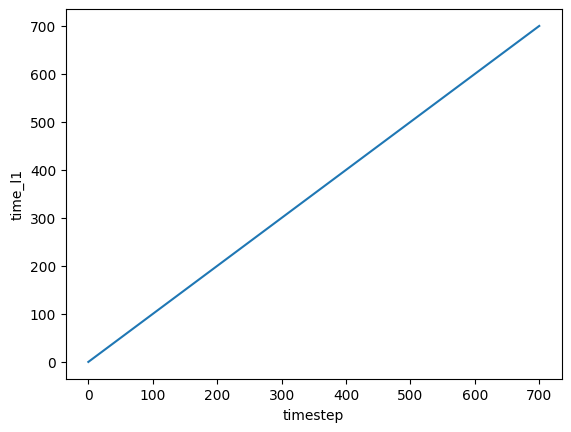

In [3]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [4]:
sim_df.head(4)

,time_l1,delta_l1_blocks,advance_l1_blocks,agents,current_process,transactions,gas_fee_l1,gas_fee_blob,finalized_blocks_count,cumm_block_rewards,...,commit_bond_reveal_probability,gas_threshold_for_tx,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,gas_estimators,tx_estimators,slash_params
0,0,0,0,{bfcd7b00-9113-46d0-823d-672a1b3f293e: Agent(u...,None,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."
6,1,0,0,{bfcd7b00-9113-46d0-823d-672a1b3f293e: Agent(u...,Process(uuid=UUID('1199742c-b332-4e05-b6a7-160...,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."
12,2,0,0,{bfcd7b00-9113-46d0-823d-672a1b3f293e: Agent(u...,Process(uuid=UUID('1199742c-b332-4e05-b6a7-160...,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."
18,3,0,0,{bfcd7b00-9113-46d0-823d-672a1b3f293e: Agent(u...,Process(uuid=UUID('1199742c-b332-4e05-b6a7-160...,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."


<Axes: xlabel='time_l1', ylabel='current_process'>

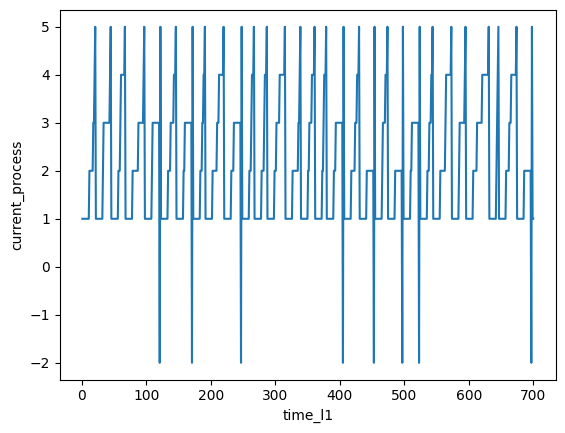

In [5]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.current_process.map(lambda x: x.phase if x is not None else None))

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

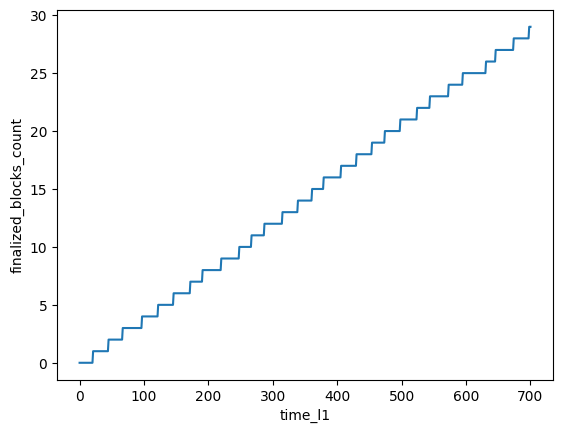

In [6]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

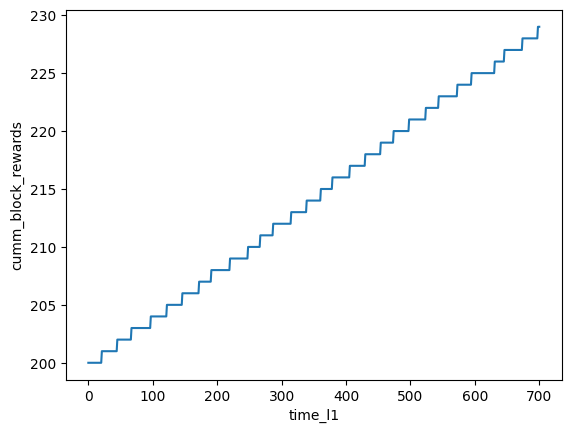

In [7]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

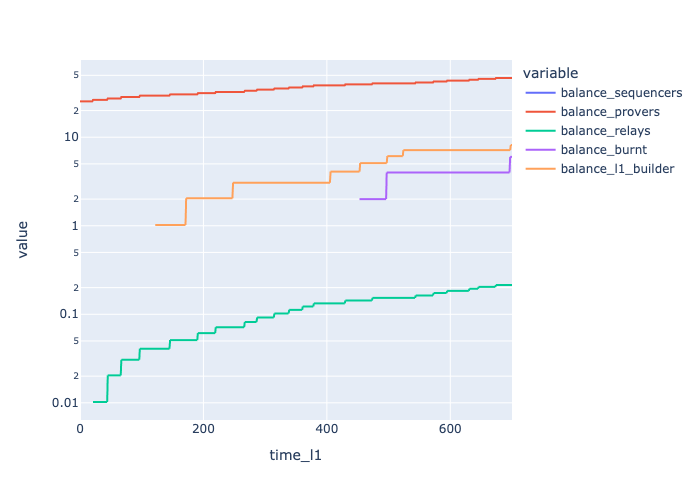

In [8]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)